# Evaluación Final Módulo 3: Fidelidad Aerolínea
     Lara Domènech 

### Fase 1: Exploración y Limpieza
    1. Exploración inicial:

In [2]:
# importamos las librerías que necesitamos

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

In [3]:
# cargamos los dataframes:
df_flight = pd.read_csv("Customer Flight Activity.csv", index_col = False)
df_flight.head(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0


In [4]:
df_loyalty = pd.read_csv("Customer Loyalty History.csv", index_col = False)
df_loyalty.head(2)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN


In [5]:
# Creamos una función básica para hacer un Análisis Exploratorio de los Datos:

def eda_basico (df):
    print('Filas iniciales:')
    display(df.head())
    print('----------------------------------------------------------------------------------')
    print('Filas finales:')
    display(df.tail())
    print('----------------------------------------------------------------------------------')    
    print('Filas aleatorias:')
    display(df.sample(5))
    print('----------------------------------------------------------------------------------')
    print('Número de filas:')
    display(df.shape[0])
    print('----------------------------------------------------------------------------------')
    print('Número de columnas:')
    display(df.shape[1])
    print('----------------------------------------------------------------------------------')
    print('Información dataframe:')
    display(df.info())
    print('----------------------------------------------------------------------------------')
    print('Nombre de las columnas:')
    display(df.columns)
    print('----------------------------------------------------------------------------------')
    print('Descripción datos númericos:')
    display(df.describe().T)
    print('----------------------------------------------------------------------------------')
    print('Descripción datos string')
    try:
        display(df.describe(include='object').T)
    except:
        print('No hay datos tipo string')
    print('----------------------------------------------------------------------------------')
    print('Cuantos datos únicos hay por columna:')
    display(df.nunique())
    print('----------------------------------------------------------------------------------')
    for col in df.columns:
        print(f'Datos unicos de la {col}:\n {df[col].value_counts()}\n')
    print('----------------------------------------------------------------------------------')
    print('Cuantos datos nulos hay:')
    porcentaje_nulos = round((df.isnull().sum()/df.shape[0])*100,2)
    display(porcentaje_nulos.sort_values(ascending=False))
    print('----------------------------------------------------------------------------------')
    print('Filas duplicadas:')
    duplicadas = df.duplicated().sum()
    print(f'Cantidad de duplicados: {duplicadas}')
    if duplicadas >0:
        print('Primeros duplicados:')
        display(df[df.duplicated()].head(2))
    else:
        print('No hay duplicados')
    print('------------------------------------------------------------------------------------')
    print('Columnas constantes (solo 1 valor único):')
    constantes = df.columns[df.nunique() <= 1]
    if len(constantes) > 0:
        print(f'{len(constantes)} columnas con 1 valor único:')
        display(constantes)
    else:
        print('No hay columnas constantes')

In [6]:
# Aplicamos la función a nuestros datos:

eda_basico(df_flight)

Filas iniciales:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


----------------------------------------------------------------------------------
Filas finales:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


----------------------------------------------------------------------------------
Filas aleatorias:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
71084,286388,2017,5,0,0,0,0,0.0,0,0
8186,536794,2017,1,0,0,0,0,0.0,0,0
36034,218425,2017,3,16,2,18,3690,369.0,0,0
53619,256945,2017,4,0,0,0,0,0.0,0,0
104684,275846,2017,7,0,0,0,0,0.0,0,0


----------------------------------------------------------------------------------
Número de filas:


405624

----------------------------------------------------------------------------------
Número de columnas:


10

----------------------------------------------------------------------------------
Información dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


None

----------------------------------------------------------------------------------
Nombre de las columnas:


Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

----------------------------------------------------------------------------------
Descripción datos númericos:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


----------------------------------------------------------------------------------
Descripción datos string
No hay datos tipo string
----------------------------------------------------------------------------------
Cuantos datos únicos hay por columna:


Loyalty Number                 16737
Year                               2
Month                             12
Flights Booked                    22
Flights with Companions           12
Total Flights                     33
Distance                        4746
Points Accumulated              1549
Points Redeemed                  587
Dollar Cost Points Redeemed       49
dtype: int64

----------------------------------------------------------------------------------
Datos unicos de la Loyalty Number:
 Loyalty Number
678205    72
989528    48
373638    48
684889    48
684881    48
869265    48
402697    48
215508    48
336882    48
584833    48
774168    48
584782    48
622975    48
773857    48
990512    48
112142    48
790940    48
322169    48
237094    48
357901    48
684123    48
499874    48
968034    48
156031    48
713132    48
876062    48
444092    48
992168    48
969318    48
653081    48
833793    48
604870    48
950980    48
206050    48
278854    48
951353    48
474305    48
536021    48
604274    48
971370    48
130331    48
106509    48
776466    48
417240    48
585756    48
309230    48
460272    48
732304    48
775768    48
988392    48
825517    48
263267    48
819842    48
403529    48
308480    48
200519    48
746226    48
582493    48
198499    48
243741    48
825593    48
617489    48
958491    48
488224    48
700650    48
897772    48
577232  

Loyalty Number                 0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64

----------------------------------------------------------------------------------
Filas duplicadas:
Cantidad de duplicados: 1864
Primeros duplicados:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
42,101902,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0


------------------------------------------------------------------------------------
Columnas constantes (solo 1 valor único):
No hay columnas constantes


In [7]:
eda_basico(df_loyalty)

Filas iniciales:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


----------------------------------------------------------------------------------
Filas finales:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


----------------------------------------------------------------------------------
Filas aleatorias:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
1700,331706,Canada,Alberta,Banff,T4V 1D4,Male,Bachelor,77062.0,Married,Aurora,6410.97,Standard,2013,4,NaN,NaN
6165,656858,Canada,British Columbia,West Vancouver,V6V 8Z3,Male,Bachelor,70490.0,Divorced,Nova,4863.47,Standard,2018,5,NaN,NaN
4880,682528,Canada,Quebec,Montreal,H4G 3T4,Female,Bachelor,92826.0,Married,Nova,3226.85,Standard,2012,11,NaN,NaN
12230,192098,Canada,Ontario,Ottawa,K1G 4Z0,Male,Bachelor,51176.0,Married,Star,17086.75,2018 Promotion,2018,2,NaN,NaN
10402,889061,Canada,Ontario,Toronto,M2Z 4K1,Female,High School or Below,57955.0,Married,Star,2416.54,Standard,2014,7,NaN,NaN


----------------------------------------------------------------------------------
Número de filas:


16737

----------------------------------------------------------------------------------
Número de columnas:


16

----------------------------------------------------------------------------------
Información dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 

None

----------------------------------------------------------------------------------
Nombre de las columnas:


Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

----------------------------------------------------------------------------------
Descripción datos númericos:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


----------------------------------------------------------------------------------
Descripción datos string


,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


----------------------------------------------------------------------------------
Cuantos datos únicos hay por columna:


Loyalty Number        16737
Country                   1
Province                 11
City                     29
Postal Code              55
Gender                    2
Education                 5
Salary                 5890
Marital Status            3
Loyalty Card              3
CLV                    7984
Enrollment Type           2
Enrollment Year           7
Enrollment Month         12
Cancellation Year         6
Cancellation Month       12
dtype: int64

----------------------------------------------------------------------------------
Datos unicos de la Loyalty Number:
 Loyalty Number
480934    1
208485    1
455896    1
469781    1
533488    1
630694    1
707557    1
738459    1
947863    1
793134    1
891903    1
129817    1
897734    1
618300    1
935836    1
167062    1
212735    1
246591    1
951879    1
285636    1
327972    1
351292    1
375430    1
660349    1
797326    1
744837    1
198785    1
695069    1
281952    1
515905    1
228772    1
334575    1
103502    1
574771    1
614810    1
165224    1
641612    1
260855    1
575487    1
427140    1
458029    1
616083    1
675651    1
717762    1
720079    1
740090    1
839527    1
198900    1
340881    1
216762    1
824351    1
510440    1
803234    1
493598    1
848694    1
688731    1
839356    1
141655    1
549751    1
443232    1
588993    1
451425    1
928354    1
534813    1
839748    1
351551    1
990947    1
540905    1
375203    1
551938    1
556808    1
571970    1
60

Cancellation Year     87.65
Cancellation Month    87.65
Salary                25.32
Loyalty Number         0.00
Country                0.00
Province               0.00
City                   0.00
Postal Code            0.00
Gender                 0.00
Education              0.00
Marital Status         0.00
Loyalty Card           0.00
CLV                    0.00
Enrollment Type        0.00
Enrollment Year        0.00
Enrollment Month       0.00
dtype: float64

----------------------------------------------------------------------------------
Filas duplicadas:
Cantidad de duplicados: 0
No hay duplicados
------------------------------------------------------------------------------------
Columnas constantes (solo 1 valor único):
1 columnas con 1 valor único:


Index(['Country'], dtype='object')

In [ ]:
# Para unir los dos conjuntos de datos usaremos un merge de tipo inner, así saldrán todos los vuelos que tienen un ID de correspondencia en fidelidad:

df = df_flight.merge(df_loyalty, on='Loyalty Number', how='inner')
df.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


    2. Limpieza de Datos:

In [9]:
porcentaje_nulos = round((df.isnull().sum()/df.shape[0])*100,2)
display(porcentaje_nulos.sort_values(ascending=False))

Cancellation Month             87.66
Cancellation Year              87.66
Salary                         25.31
Postal Code                     0.00
Enrollment Month                0.00
Enrollment Year                 0.00
Enrollment Type                 0.00
CLV                             0.00
Loyalty Card                    0.00
Marital Status                  0.00
Education                       0.00
Gender                          0.00
Loyalty Number                  0.00
Year                            0.00
Province                        0.00
Country                         0.00
Dollar Cost Points Redeemed     0.00
Points Redeemed                 0.00
Points Accumulated              0.00
Distance                        0.00
Total Flights                   0.00
Flights with Companions         0.00
Flights Booked                  0.00
Month                           0.00
City                            0.00
dtype: float64

In [ ]:
# Para tratar los nulos, en el df, las columnas de 'Cancellation Month' y 'Cancellation Year' tienen un porcentaje muy elevado de nulos, pero esto es porque hay muchos clientes que siguen activos. Haré una columna nueva 
# juntando la fecha de cancelación (mes-año) y poniendo el dia 1 del mes, si tienen, y en caso contrario lo rellenará con NaT. Igualmente crearemos una nueva columna de 'status' que nos permitirá seleccionar si el cliente 
# está activo o ha cancelado la suscripción. Haremos lo mismo, juntando las fechas de las columnas 'Enrollment Year' y 'Enrollment Month', pero como no tienen valores nulos, no nos pondrá NaT.

df['Cancellation Date'] = pd.to_datetime({'year':  df['Cancellation Year'],'month': df['Cancellation Month'],'day':   1}, errors='coerce')
df['Enrollment Date'] = pd.to_datetime({'year' : df['Enrollment Year'], 'month' : df['Enrollment Month'], 'day' : 1}, errors='coerce')

In [11]:
# Creamos el estado de cliente, si sigue activo o si ha cancelado:

df['Customer Status'] = df['Cancellation Date'].isna().map({True: 'Active', False: 'Cancelled'})

In [12]:
# Eliminamos las columnas originales de cancelación e inscripción. A parte, la columna de 'Country', al ser siempre Canadá, no nos da información, así que también la eliminamos. 

df.drop(['Cancellation Year', 'Cancellation Month', 'Country', 'Enrollment Year', 'Enrollment Month'], axis=1, inplace=True)

In [13]:
# En la exploración he visto que 'Salary' presentaba valores negativos. Entiendo que es un error al entrar el dato, por eso, paso todos los valores a valor absoluto, y así nos quedamos con los datos sin el negativo delante:

df['Salary'] = df['Salary'].abs() 
print(df['Salary'].unique())

[92552.    nan 63253. ... 23160. 97206. 56345.]


In [14]:
# Ahora falta tratar los nulos de 'Salary', es un porcentaje alto, pero igualmente primero veremos la distribución en un histograma y después haremos la imputación:

round(df['Salary'].value_counts(dropna=False, normalize=True) * 100,2)



Salary
NaN         25.31
101933.0     0.14
62283.0      0.08
61809.0      0.08
51573.0      0.08
76159.0      0.08
81765.0      0.08
57870.0      0.08
78573.0      0.08
64001.0      0.08
79325.0      0.07
80816.0      0.07
67445.0      0.07
100159.0     0.07
87782.0      0.07
210090.0     0.07
102379.0     0.07
84988.0      0.07
64680.0      0.07
65935.0      0.07
78830.0      0.07
221857.0     0.07
84147.0      0.07
84015.0      0.07
127574.0     0.07
79329.0      0.07
92259.0      0.07
76622.0      0.07
102982.0     0.07
92396.0      0.07
91817.0      0.07
90265.0      0.07
73602.0      0.07
89435.0      0.07
51510.0      0.07
56644.0      0.07
100817.0     0.07
65997.0      0.07
54457.0      0.07
199894.0     0.07
87635.0      0.07
85447.0      0.07
128118.0     0.07
72656.0      0.07
75827.0      0.07
74756.0      0.07
70384.0      0.07
59169.0      0.07
58725.0      0.07
83322.0      0.07
103151.0     0.07
75891.0      0.07
112860.0     0.07
114551.0     0.07
250253.0     0.07
728

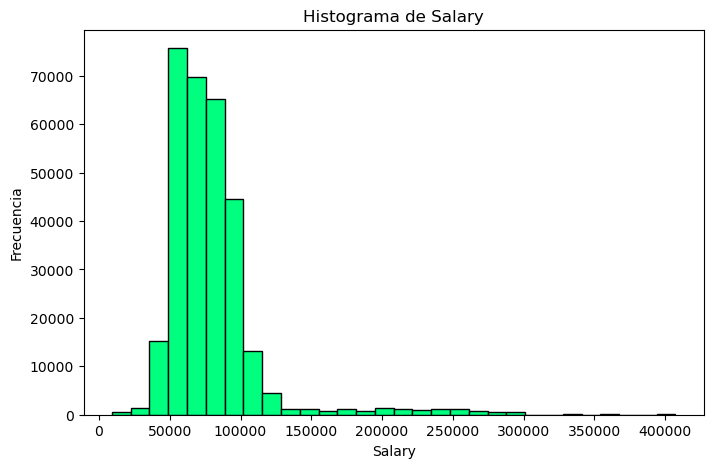

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df['Salary'].dropna(), bins=30, color='springgreen', edgecolor='black')
plt.title(f'Histograma de Salary')
plt.xlabel('Salary')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Aunque la columna de 'Salary' tenga un 25% de valores nulos, es una variable interesante. Como tiene una distribución asimétrica y el porcentaje alto, haremos una imputación con el KNNImputer, ya que no tiene una correlación 
# directa con otra columna, sino que se basaría en varios datos de un mismo registro para sacar el valor faltante, usando la media de los valores correspondientes en los vecinos más cercanos. En esta base de datos hay clientes 
# repetidos y puede ser que a un mismo cliente nos esté aplicando salarios diferentes...

imputer_knn = KNNImputer(n_neighbors=20)
df['Salary'] = imputer_knn.fit_transform(df[['Salary']])

In [67]:
# Volvemos a revisar cuántos nulos quedan en nuestra base de datos. Sale un 87% de nulos en la fecha de cancelación, ya que son clientes que no han cancelado y al cambiar el tipo de dato a Datetime quedan como NaT y no NaN,
# también podría eliminar la columna ya que ya hemos creado otra poniendo si estan activos a cancelados.

porcentaje_nulos = round((df.isnull().sum()/df.shape[0])*100,2)
display(porcentaje_nulos.sort_values(ascending=False))

Cancellation Date              87.66
Loyalty Number                  0.00
Postal Code                     0.00
Enrollment Date                 0.00
Enrollment Type                 0.00
CLV                             0.00
Loyalty Card                    0.00
Marital Status                  0.00
Salary                          0.00
Education                       0.00
Gender                          0.00
City                            0.00
Year                            0.00
Province                        0.00
Dollar Cost Points Redeemed     0.00
Points Redeemed                 0.00
Points Accumulated              0.00
Distance                        0.00
Total Flights                   0.00
Flights with Companions         0.00
Flights Booked                  0.00
Month                           0.00
Customer Status                 0.00
dtype: float64

In [68]:
# Revisamos los tipos de datos que nos han quedado en las columnas:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Loyalty Number               405624 non-null  int64         
 1   Year                         405624 non-null  int64         
 2   Month                        405624 non-null  int64         
 3   Flights Booked               405624 non-null  int64         
 4   Flights with Companions      405624 non-null  int64         
 5   Total Flights                405624 non-null  int64         
 6   Distance                     405624 non-null  int64         
 7   Points Accumulated           405624 non-null  float64       
 8   Points Redeemed              405624 non-null  int64         
 9   Dollar Cost Points Redeemed  405624 non-null  int64         
 10  Province                     405624 non-null  object        
 11  City                      

In [69]:
# Vemos una muestra de los registros de la base de datos limpia:

df.sample(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Cancellation Date,Enrollment Date,Customer Status
5520,396471,2017,1,0,0,0,0,0.00,0,0,Ontario,Toronto,P1J 8T7,Male,Bachelor,64913.0,Married,Aurora,17476.64,Standard,NaT,2013-12-01,Active
118072,987122,2017,7,0,0,0,0,0.00,0,0,New Brunswick,Fredericton,E3B 2H2,Female,Bachelor,81443.0,Married,Nova,10852.96,Standard,NaT,2017-04-01,Active
245430,570600,2018,3,0,0,0,0,0.00,0,0,New Brunswick,Fredericton,E3B 2H2,Male,Bachelor,48399.0,Married,Star,2554.03,Standard,NaT,2013-04-01,Active
186743,144355,2017,12,0,0,0,0,0.00,0,0,Ontario,Toronto,P1J 8T7,Male,Bachelor,100483.0,Married,Nova,8131.78,Standard,NaT,2012-07-01,Active
173144,322000,2017,11,0,0,0,0,0.00,0,0,Ontario,Trenton,K8V 4B2,Female,Bachelor,75231.0,Single,Star,13770.98,Standard,NaT,2013-05-01,Active
233815,126424,2018,2,3,0,3,918,113.75,0,0,Quebec,Montreal,H2Y 2W2,Male,High School or Below,80289.0,Divorced,Nova,16355.31,Standard,NaT,2015-03-01,Active
393402,349730,2018,12,1,1,2,3484,348.00,0,0,Ontario,Toronto,M2P 4F6,Male,Doctor,279093.0,Single,Nova,6232.69,Standard,NaT,2014-07-01,Active
339642,187459,2018,9,0,0,0,0,0.00,0,0,Quebec,Montreal,H2T 9K8,Male,Bachelor,49960.0,Married,Aurora,7297.69,Standard,NaT,2017-08-01,Active
240033,282759,2018,3,0,0,0,0,0.00,0,0,Ontario,Toronto,M8Y 4K8,Female,Bachelor,67044.0,Married,Aurora,7706.04,Standard,NaT,2018-10-01,Active
234486,884708,2018,2,0,0,0,0,0.00,0,0,Ontario,Ottawa,K1F 2R2,Male,Bachelor,73131.0,Married,Nova,7765.23,Standard,NaT,2015-09-01,Active


In [ ]:
# Guardamos el DataFrame limpio a un csv:

df.to_csv('Customer Flight Loyalty.csv', index=False)

### Fase 2: Visualización
    1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

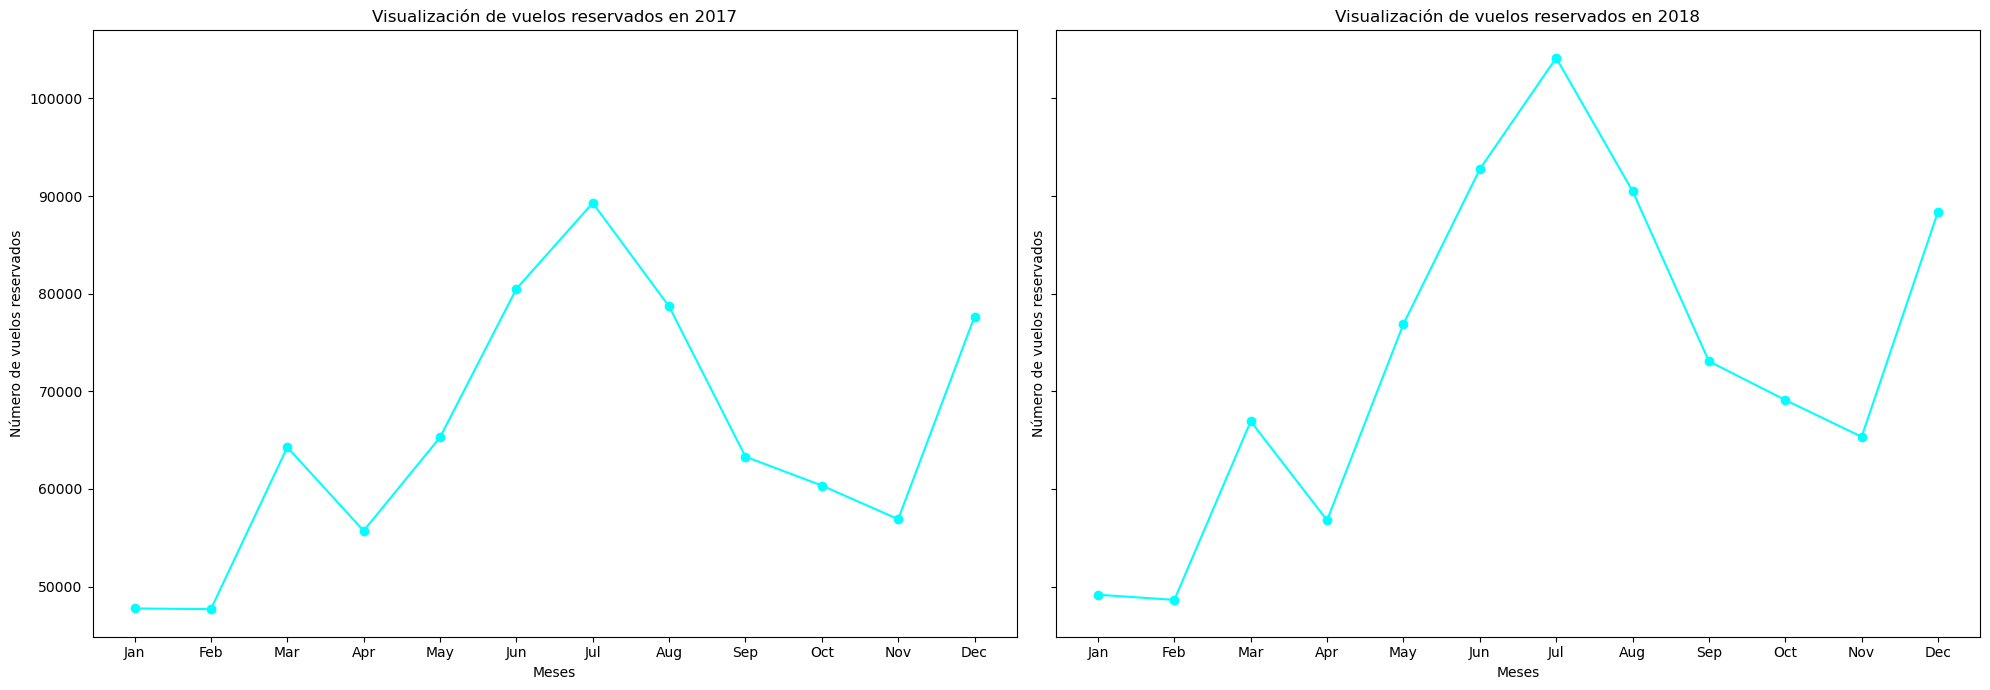

In [ ]:
# Lo representamos con gráficas de líneas temporales:

import calendar

df_17 = df[df['Year'] == 2017]
df_reservas_17 = df_17.groupby('Month')['Flights Booked'].sum().reset_index().sort_values(by = 'Month', ascending = True)

df_18 = df[df['Year'] == 2018]
df_reservas_18 = df_18.groupby('Month')['Flights Booked'].sum().reset_index().sort_values(by = 'Month', ascending = True)

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 7), sharey = True)

axes[0].plot(df_reservas_17['Month'], df_reservas_17['Flights Booked'], color='aqua', marker='o')
axes[0].set_xlabel("Meses")
axes[0].set_xticks(range(1,13), [calendar.month_abbr[m] for m in range(1,13)])
axes[0].set_ylabel("Número de vuelos reservados")
axes[0].set_title('Visualización de vuelos reservados en 2017')

axes[1].plot(df_reservas_18['Month'], df_reservas_18['Flights Booked'], color='aqua', marker='o')
axes[1].set_xlabel("Meses")
axes[1].set_xticks(range(1,13), [calendar.month_abbr[num] for num in range(1,13)])
axes[1].set_ylabel("Número de vuelos reservados")
axes[1].set_title('Visualización de vuelos reservados en 2018')

plt.tight_layout()
plt.show()

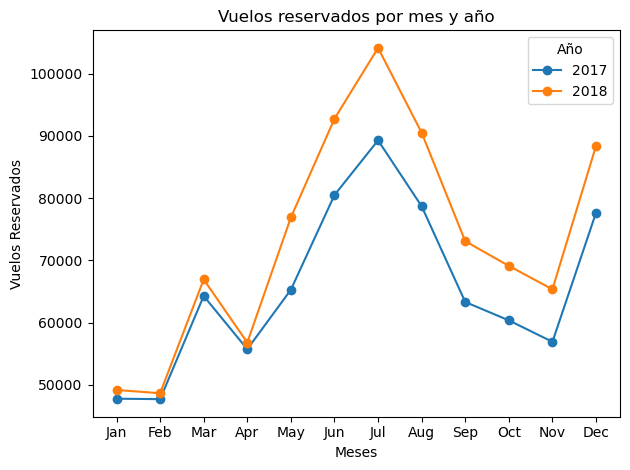

In [72]:
# Hacemos lo msimo pero lo juntamos en un mismo gráfico:

df_reservas = df.groupby(['Year', 'Month'])['Flights Booked'].sum().reset_index().sort_values(by = ['Year', 'Month'], ascending = True)

df_reservas_ok = df_reservas.pivot(index='Month', columns='Year', values='Flights Booked')

plt.figure()
for year in df_reservas_ok.columns:
    plt.plot(
        df_reservas_ok.index,
        df_reservas_ok[year].values,
        marker='o',
        label=str(year)
    )

plt.xlabel('Meses')
plt.xticks(range(1, 13), [calendar.month_abbr[num] for num in range(1, 13)])
plt.ylabel('Vuelos Reservados')
plt.title('Vuelos reservados por mes y año')
plt.legend(title='Año')
plt.tight_layout()
plt.show()

    2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

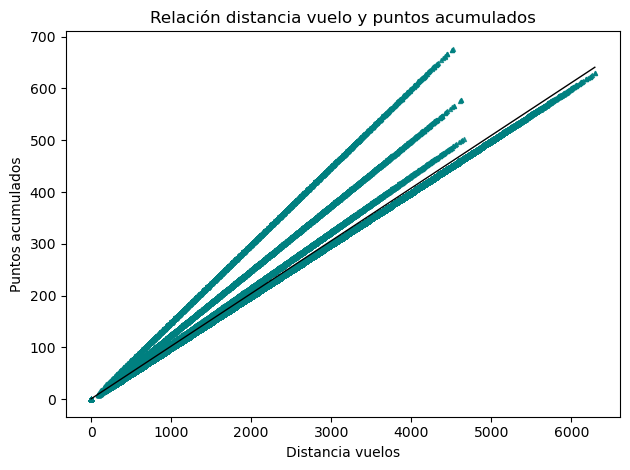

In [ ]:
# Podemos visualizar la relación en un regplot, que nos dibuja la línea de tendencia:


sns.regplot(x = df['Distance'], y = df['Points Accumulated'], marker='^', line_kws = {"color": "black", "linewidth": 1}, scatter_kws = {"color": "teal", "s": 8})
plt.title('Relación distancia vuelo y puntos acumulados')
plt.xlabel('Distancia vuelos')
plt.ylabel('Puntos acumulados')
plt.tight_layout() 
plt.show()

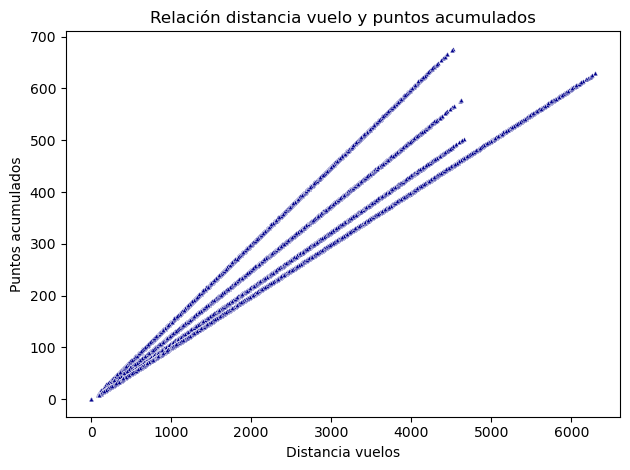

In [30]:
# O con un scatterplot:


sns.scatterplot(x = df['Distance'], y = df['Points Accumulated'], marker='^', color = 'darkblue', s = 10)
plt.title('Relación distancia vuelo y puntos acumulados')
plt.xlabel('Distancia vuelos')
plt.ylabel('Puntos acumulados')
plt.tight_layout() 
plt.show()

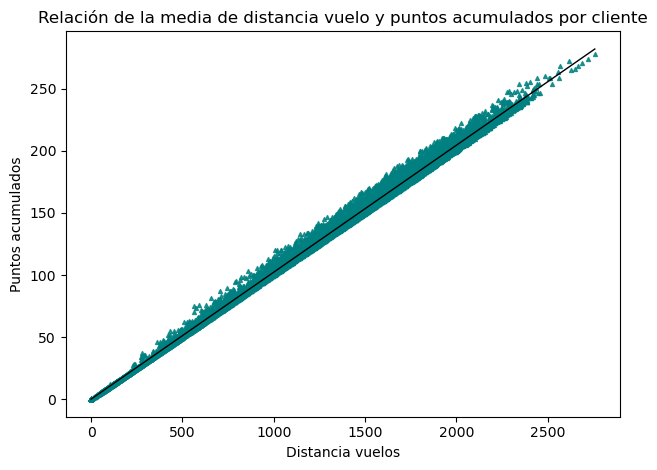

In [77]:
# Otra opción sería agrupar por número de cliente y hacer una media de las distancias y puntos acumulados de cada uno de ellos:

df2 = df.groupby('Loyalty Number')[['Distance', 'Points Accumulated']].mean()

sns.regplot(x = df2['Distance'], y = df2['Points Accumulated'], marker='^', line_kws = {"color": "black", "linewidth": 1}, scatter_kws = {"color": "teal", "s": 8})
plt.title('Relación de la media de distancia vuelo y puntos acumulados por cliente')
plt.xlabel('Distancia vuelos')
plt.ylabel('Puntos acumulados')
plt.tight_layout() 
plt.show()

##### Observamos una clara relación positiva: A mayor distancia de vuelo, más puntos acumulados tiene el cliente.

    3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [ ]:
# Primero generamos un df sin clientes repetidos, para que las consultas sean más reales:

df_clientes = df.drop_duplicates(subset='Loyalty Number', keep='first')

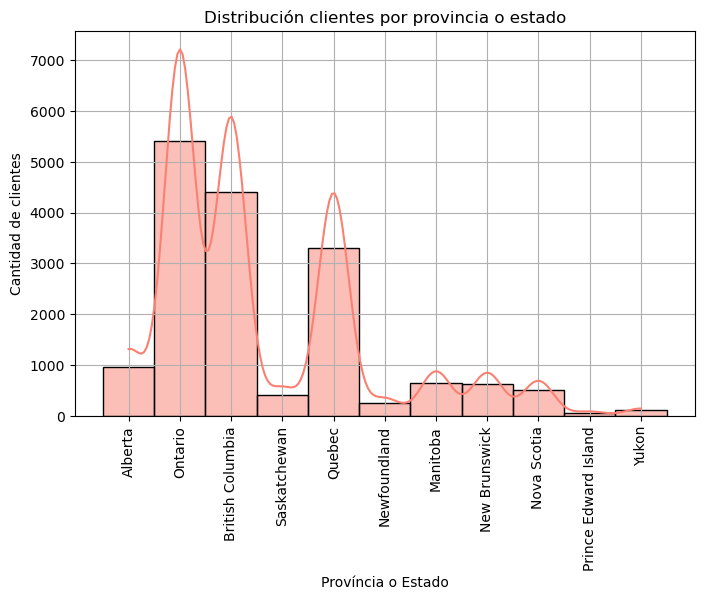

In [32]:
# La distribución la valoramos con un histograma:

plt.figure(figsize=(8, 5))
sns.histplot(data=df_clientes, x='Province', bins=20, kde=True, color='salmon')
plt.title('Distribución clientes por provincia o estado')
plt.xlabel('Província o Estado')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

##### Los clientes sobretodo se concentran en Ontario, British Columbia y Quebec.

    4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

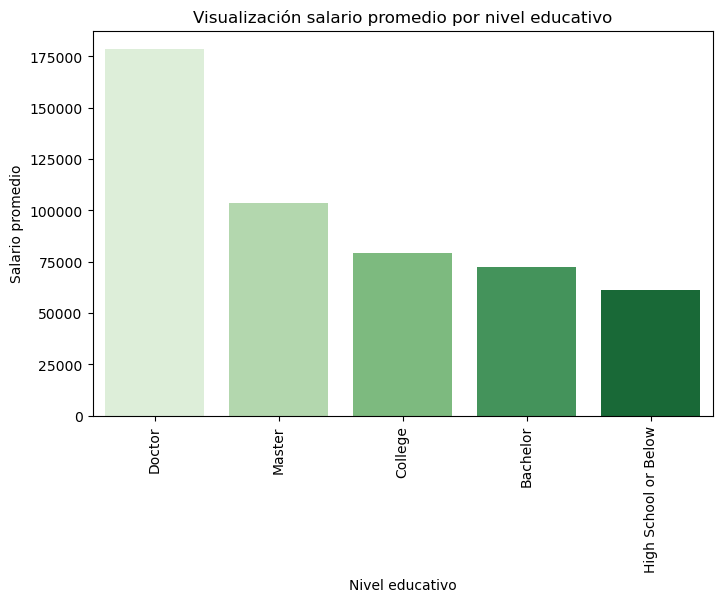

In [33]:
# Lo mostramos en un gráfico de barras:

df_salario_medio = df_clientes.groupby('Education')['Salary'].mean().reset_index().sort_values(by='Salary', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Education', y= 'Salary', data=df_salario_medio, palette='Greens')
plt.xlabel('Nivel educativo')
plt.ylabel('Salario promedio')
plt.title('Visualización salario promedio por nivel educativo')
plt.xticks(rotation=90)
plt.show()



    5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad

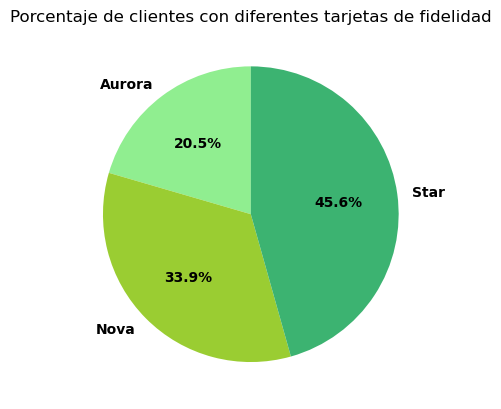

In [34]:
# Representamos la proporción de clientes con un piechart:

df_tarjeta_fidelidad = df_clientes.groupby('Loyalty Card')['Loyalty Number'].count().reset_index()


colores = ["lightgreen", "yellowgreen", "mediumseagreen"]

valores = df_tarjeta_fidelidad["Loyalty Number"]
etiquetas = df_tarjeta_fidelidad["Loyalty Card"]

plt.pie(valores, labels=etiquetas,
        data = df_tarjeta_fidelidad, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 10, 'fontweight': 'bold'}, 
        startangle=90);
        
plt.title("Porcentaje de clientes con diferentes tarjetas de fidelidad")
plt.show()

    6. ¿Cómo se distribuyen los clientes según su estado civil y género?

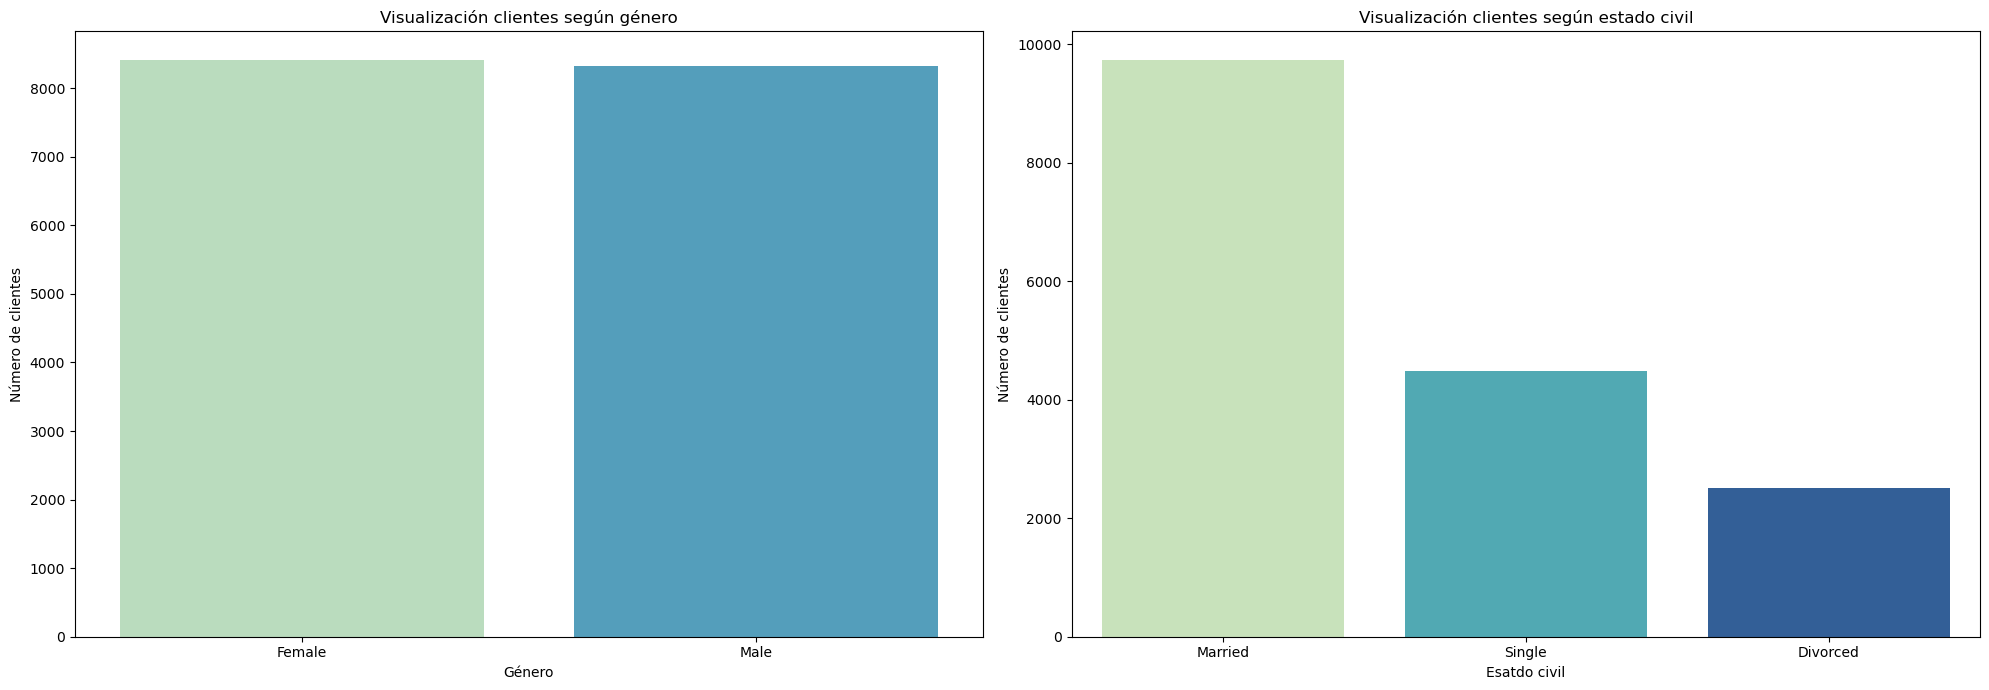

In [35]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 7))

#Primero representamos los clientes según el género:

df_genero = df_clientes.groupby('Gender')['Loyalty Number'].count().reset_index().sort_values(by='Loyalty Number', ascending=False)

sns.barplot(x='Gender', y= 'Loyalty Number', data=df_genero, palette='GnBu', ax = axes[0])
axes[0].set_xlabel("Género")
axes[0].set_ylabel("Número de clientes")
axes[0].set_title('Visualización clientes según género')

#En la otra gráfica mostramos lo mismo pero por estado civil:

df_estado = df_clientes.groupby('Marital Status')['Loyalty Number'].count().reset_index().sort_values(by='Loyalty Number', ascending=False)

sns.barplot(x='Marital Status', y= 'Loyalty Number', data=df_estado, palette='YlGnBu', ax = axes[1])
axes[1].set_xlabel("Esatdo civil")
axes[1].set_ylabel("Número de clientes")
axes[1].set_title('Visualización clientes según estado civil')

plt.tight_layout()
plt.show()

In [ ]:
# Podemos hacer una tabla cruzada y utilizarla para generar una única gráfica de barras partidas con las 2 variables:

df_genero_estado = pd.crosstab(df_clientes['Marital Status'], df_clientes['Gender'])
df_genero_estado

Gender,Female,Male
Marital Status,,
Divorced,1269,1249
Married,4869,4866
Single,2272,2212


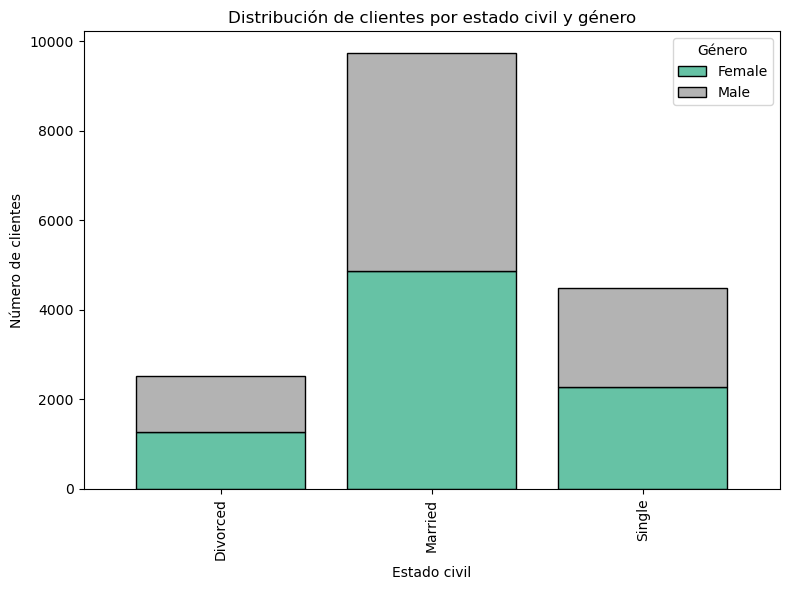

In [ ]:

df_genero_estado.plot(
    kind='bar',
    stacked=True,
    colormap='Set2',
    figsize=(8, 6),
    width=0.8,
    edgecolor='black'
)

plt.xlabel("Estado civil")
plt.ylabel("Número de clientes")
plt.title("Distribución de clientes por estado civil y género")
plt.legend(title="Género")
plt.tight_layout()
plt.show()

### BONUS Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo
    1. Preparación de datos: Filtra el conjunto de datos para incluir las columnas: 'Flights Booked' y 'Education'

In [ ]:
# Aquí lo he hecho de manera general, sin tener en cuenta los clientes.

df_reservas_educa = df[['Flights Booked', 'Education']]
df_reservas_educa.head(10)

,Flights Booked,Education
0,3,Bachelor
1,10,College
2,6,College
3,0,Bachelor
4,0,Bachelor
5,0,Bachelor
6,0,Bachelor
7,0,Bachelor
8,6,Bachelor
9,0,Bachelor


    2. Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas

In [78]:
df_analisis = (df_reservas_educa.groupby('Education')['Flights Booked'].agg([
        ('Número registros', 'count'),
        ('Media vuelos', 'mean'),
        ('Desv. estándar', 'std'),
        ('Varianza', 'var'),
        ('Mínimo', 'min'),
        ('Mediana', 'median'),
        ('Máximo', 'max'),
        ('Moda', lambda x: x.mode().iloc[0])
    ]).round(2))

df_analisis

,Número registros,Media vuelos,Desv. estándar,Varianza,Mínimo,Mediana,Máximo,Moda
Education,,,,,,,,
Bachelor,253752,4.09,5.22,27.22,0,1.0,21,0
College,102672,4.15,5.24,27.48,0,1.0,21,0
Doctor,17856,4.15,5.25,27.56,0,1.0,21,0
High School or Below,19008,4.16,5.23,27.40,0,1.0,21,0
Master,12336,4.18,5.21,27.15,0,1.0,21,0


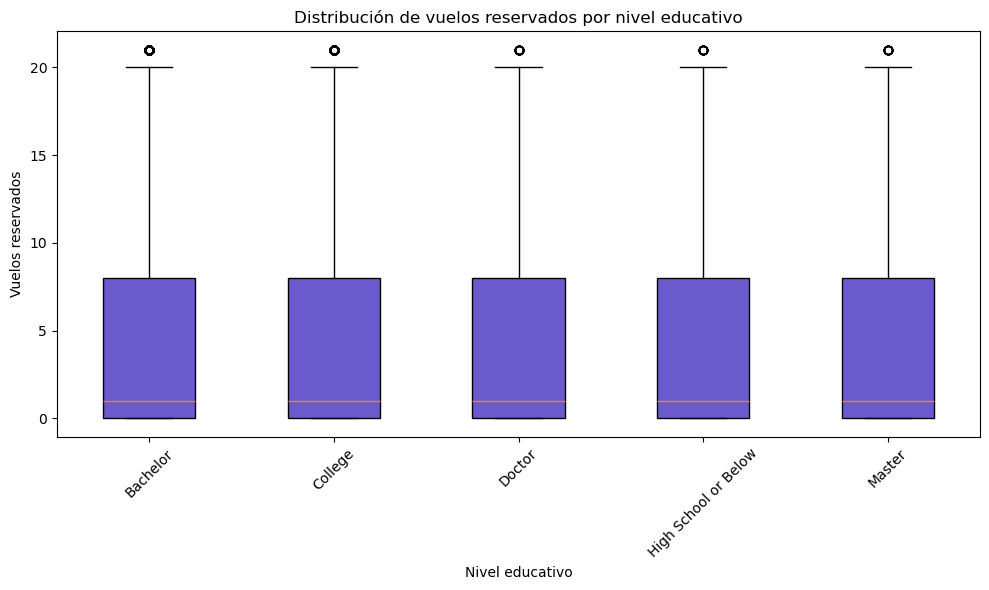

In [86]:
categorias = sorted(df_reservas_educa['Education'].unique())

valores = [df_reservas_educa.loc[df_reservas_educa['Education'] == cat, 'Flights Booked'].values for cat in categorias]

plt.figure(figsize=(10, 6))
plt.boxplot(valores, labels=categorias, patch_artist=True, boxprops={'facecolor': 'slateblue'})

plt.xlabel('Nivel educativo')
plt.ylabel('Vuelos reservados')
plt.title('Distribución de vuelos reservados por nivel educativo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Otra manera para hacer los ejercicios anteriores, seria agrupando por cliente y haciendo la suma de las reservas de cada uno, pero es muy parecido:

df_reservas_clientes = df.groupby(['Loyalty Number', 'Education'])['Flights Booked'].sum().reset_index()
df_reservas_clientes_educ = df_reservas_clientes[['Flights Booked', 'Education']]
df_reservas_clientes_educ.head(10)

,Flights Booked,Education
0,157,Bachelor
1,173,College
2,152,College
3,79,Bachelor
4,127,Bachelor
5,145,Bachelor
6,111,Bachelor
7,116,Bachelor
8,121,Bachelor
9,67,Bachelor


In [84]:
df_analisis2 = (df_reservas_clientes_educ.groupby('Education')['Flights Booked'].agg([
        ('Número clientes', 'count'),
        ('Media vuelos', 'mean'),
        ('Desv. estándar', 'std'),
        ('Varianza', 'var'),
        ('Mínimo', 'min'),
        ('Mediana', 'median'),
        ('Máximo', 'max'),
        ('Moda', lambda x: x.mode().iloc[0])
    ]).round(2))

df_analisis2

,Número clientes,Media vuelos,Desv. estándar,Varianza,Mínimo,Mediana,Máximo,Moda
Education,,,,,,,,
Bachelor,10475,99.10,54.23,2941.06,0,113.0,354,0
College,4238,100.61,54.21,2938.60,0,113.0,324,0
Doctor,734,100.87,55.93,3128.54,0,115.0,292,0
High School or Below,782,101.01,54.87,3010.44,0,115.0,265,0
Master,508,101.60,54.02,2918.50,0,113.0,322,0


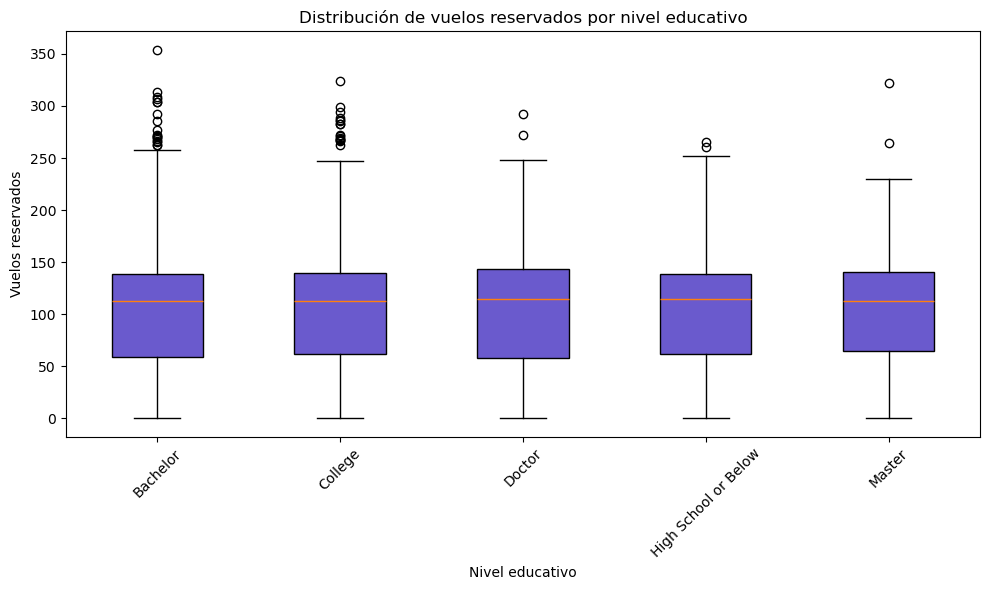

In [85]:
categorias = sorted(df_reservas_clientes_educ['Education'].unique())

valores = [df_reservas_clientes_educ.loc[df_reservas_clientes_educ['Education'] == cat, 'Flights Booked'].values for cat in categorias]

plt.figure(figsize=(10, 6))
plt.boxplot(valores, labels=categorias, patch_artist=True, boxprops={'facecolor': 'slateblue'})

plt.xlabel('Nivel educativo')
plt.ylabel('Vuelos reservados')
plt.title('Distribución de vuelos reservados por nivel educativo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

    3. Prueba estadística: Realiza una prueba de hipótesis para determinar si existe diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

In [87]:
# Primero filtramos los datos para obtener los 5 grupos:
grupo_educacion_bachelor = df_reservas_educa[df_reservas_educa['Education'] == 'Bachelor']["Flights Booked"]
grupo_educacion_college = df_reservas_educa[df_reservas_educa['Education'] == 'College']["Flights Booked"]
grupo_educacion_doctor = df_reservas_educa[df_reservas_educa['Education'] == 'Doctor']["Flights Booked"]
grupo_educacion_high_sch = df_reservas_educa[df_reservas_educa['Education'] == 'High School or Below']["Flights Booked"]
grupo_educacion_master = df_reservas_educa[df_reservas_educa['Education'] == 'Master']["Flights Booked"]


In [89]:
def check_normalidad(data):

    n = len(data)
    
    if n <= 5000:
        # Usar Shapiro-Wilk para muestras pequeñas y medianas
        test_name = "Shapiro-Wilk"
        stat, p_value = shapiro(data)
    else:
        # Usar Kolmogorov-Smirnov para muestras grandes
        test_name = "Kolmogorov-Smirnov"
        stat, p_value = kstest(data, 'norm')

    if p_value > 0.05:
        decision = "No se rechaza H0: Los datos parecen seguir una distribución normal."
    else:
        decision = "Se rechaza H0: Los datos no siguen una distribución normal."
    
    return {
        "Prueba": test_name,
        "Estadístico": stat,
        "p-value": p_value,
        "Decisión": decision
    }

In [90]:
check_normalidad(grupo_educacion_bachelor)

{'Prueba': 'Kolmogorov-Smirnov',
 'Estadístico': 0.5,
 'p-value': 0.0,
 'Decisión': 'Se rechaza H0: Los datos no siguen una distribución normal.'}

In [91]:
check_normalidad(grupo_educacion_college)

{'Prueba': 'Kolmogorov-Smirnov',
 'Estadístico': 0.5,
 'p-value': 0.0,
 'Decisión': 'Se rechaza H0: Los datos no siguen una distribución normal.'}

In [92]:
check_normalidad(grupo_educacion_doctor)

{'Prueba': 'Kolmogorov-Smirnov',
 'Estadístico': 0.5,
 'p-value': 0.0,
 'Decisión': 'Se rechaza H0: Los datos no siguen una distribución normal.'}

In [93]:
check_normalidad(grupo_educacion_high_sch)

{'Prueba': 'Kolmogorov-Smirnov',
 'Estadístico': 0.5,
 'p-value': 0.0,
 'Decisión': 'Se rechaza H0: Los datos no siguen una distribución normal.'}

In [94]:
check_normalidad(grupo_educacion_master)

{'Prueba': 'Kolmogorov-Smirnov',
 'Estadístico': 0.5,
 'p-value': 0.0,
 'Decisión': 'Se rechaza H0: Los datos no siguen una distribución normal.'}

#### Con estos resultados ya sabemos que tenemos que hacer un Mann-Whitney U

In [95]:
def prueba_hipotesis(*args):

    if len(args) < 2:
        raise ValueError("Se necesitan al menos dos conjuntos de datos para realizar la prueba.")
    
    # Comprobar normalidad en cada grupo
    normalidad = []
    for grupo in args:
        if len(grupo) > 5000: 
            p_valor_norm = stats.kstest(grupo, 'norm').pvalue  
        else:
            p_valor_norm = stats.shapiro(grupo).pvalue 
        normalidad.append(p_valor_norm > 0.05)

    datos_normales = all(normalidad) 

    # Prueba de igualdad de varianzas
    if datos_normales:
        p_valor_varianza = stats.bartlett(*args).pvalue 
    else:
        p_valor_varianza = stats.levene(*args, center="median").pvalue  

    varianzas_iguales = p_valor_varianza > 0.05

    # Aplicar el test adecuado
    if datos_normales:
        if varianzas_iguales:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
            test_usado = "t-test de Student (varianzas iguales)"
        else:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
            test_usado = "t-test de Welch (varianzas desiguales)"
    else:
        t_stat, p_valor = stats.mannwhitneyu(*args)
        test_usado = "Mann-Whitney U"

    # Nivel de significancia
    alfa = 0.05

    # Resultados
    resultado = {
        "Test de Normalidad": normalidad,
        "Datos Normales": datos_normales,
        "p-valor Varianza": p_valor_varianza,
        "Varianzas Iguales": varianzas_iguales,
        "Test Usado": test_usado,
        "Estadístico": t_stat,
        "p-valor": p_valor,
        "Conclusión": "Rechazamos H0. Es decir, sí hay diferencias significativas" if p_valor < alfa else "No se rechaza H0. Es decir, no hay diferencias significativas"
    }

    # Imprimir resultados de manera más clara
    print("\n📊 **Resultados de la Prueba de Hipótesis** 📊")
    print(f"✅ Test de Normalidad: {'Sí' if datos_normales else 'No'}")
    print(f"   - Normalidad por grupo: {normalidad}")
    print(f"✅ Test de Varianza: {'Iguales' if varianzas_iguales else 'Desiguales'} (p = {p_valor_varianza:.4f})")
    print(f"✅ Test aplicado: {test_usado}")
    print(f"📉 Estadístico: {t_stat:.4f}, p-valor: {p_valor:.4f}")
    print(f"🔍 Conclusión: {resultado['Conclusión']}\n")

In [96]:
prueba_hipotesis(grupo_educacion_bachelor, grupo_educacion_college)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Desiguales (p = 0.0018)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 12942655097.5000, p-valor: 0.0013
🔍 Conclusión: Rechazamos H0. Es decir, sí hay diferencias significativas



In [97]:
prueba_hipotesis(grupo_educacion_bachelor, grupo_educacion_doctor)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Iguales (p = 0.1997)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 2252352116.0000, p-valor: 0.1668
🔍 Conclusión: No se rechaza H0. Es decir, no hay diferencias significativas



In [98]:
prueba_hipotesis(grupo_educacion_bachelor, grupo_educacion_high_sch)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Iguales (p = 0.1655)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 2391340116.5000, p-valor: 0.0388
🔍 Conclusión: Rechazamos H0. Es decir, sí hay diferencias significativas



In [99]:
prueba_hipotesis(grupo_educacion_bachelor, grupo_educacion_master)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Iguales (p = 0.1068)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 1545385275.5000, p-valor: 0.0116
🔍 Conclusión: Rechazamos H0. Es decir, sí hay diferencias significativas



In [100]:
prueba_hipotesis(grupo_educacion_college, grupo_educacion_doctor)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Iguales (p = 0.8436)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 917252192.5000, p-valor: 0.8825
🔍 Conclusión: No se rechaza H0. Es decir, no hay diferencias significativas



In [101]:
prueba_hipotesis(grupo_educacion_college, grupo_educacion_high_sch)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Iguales (p = 0.8888)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 973892060.5000, p-valor: 0.6495
🔍 Conclusión: No se rechaza H0. Es decir, no hay diferencias significativas



In [102]:
prueba_hipotesis(grupo_educacion_college, grupo_educacion_master)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Iguales (p = 0.7283)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 629401321.5000, p-valor: 0.2367
🔍 Conclusión: No se rechaza H0. Es decir, no hay diferencias significativas



In [103]:
prueba_hipotesis(grupo_educacion_doctor, grupo_educacion_high_sch)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Iguales (p = 0.9620)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 169260336.5000, p-valor: 0.6449
🔍 Conclusión: No se rechaza H0. Es decir, no hay diferencias significativas



In [104]:
prueba_hipotesis(grupo_educacion_doctor, grupo_educacion_master)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Iguales (p = 0.6746)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 109389209.5000, p-valor: 0.2871
🔍 Conclusión: No se rechaza H0. Es decir, no hay diferencias significativas



In [105]:
prueba_hipotesis(grupo_educacion_high_sch, grupo_educacion_master)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Iguales (p = 0.7019)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 116750722.0000, p-valor: 0.5061
🔍 Conclusión: No se rechaza H0. Es decir, no hay diferencias significativas



#### Vemos que SÍ hay diferencias significativas en el número de vuelos reservados entre los grupos de:
    - Bachelor y College
    - Bachelor y High School
    - Bachelor y Master
#### En el resto de combinaciones no hay diferencias significativas en el número de vuelos de los clientes según el nivel educativo.

### Esto hubiese sido más fácil con un test no paramétrico ya que puedes comparar más de 2 grupos y después averiguar entre cuáles está la diferencia
